# **Gibberish Detection Pipeline**

This experiment aims to develop a robust **Gibberish Detection Pipeline** by exploring advanced techniques and frameworks. The objective is to evaluate the effectiveness of various methods for detecting incoherent or nonsensical text (commonly referred to as gibberish) while ensuring high **accuracy**, **precision**, **recall**, and **low latency** suitable for real-time applications.

---
## **Detection Approaches**

### **1. Basic Neural Networks (BNN)**  
A lightweight and efficient model for initial text classification tasks. It provides a simple yet effective method to distinguish coherent text from gibberish.  
📌 *Learn more*: [Text Classification with BNN (Kaggle Notebook)](https://www.kaggle.com/code/johnwdata/text-classification-with-basic-neural-network)  

### **2. BNN with LSTM**  
Combines **BNN** with **LSTM** (Long Short-Term Memory) for enhanced performance on longer text sequences. LSTM's sequential processing ability improves detection accuracy for complex text inputs.  
📌 *Learn more*: [LSTM for Text Generation (Machine Learning Mastery)](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)  

### **3. Guardrails-AI Validator**  
A pre-trained validator for coherence assessment, designed to filter out nonsensical or gibberish responses effectively.  
📌 *Learn more*: [Guardrails-AI GitHub Repository](https://github.com/guardrails-ai/gibberish_text/tree/main)  

### **4. GPT Fine-Tuned Prompts**  
Utilizes fine-tuned **GPT prompts** for sophisticated, context-aware gibberish detection. This approach excels in identifying incoherent inputs while maintaining meaningful responses.  

### **5. NeMo Guardrails**  
**NVIDIA's NeMo Guardrails** offers state-of-the-art validation and filtering for text inputs, ensuring high-quality text in conversational AI applications.  
📌 *Learn more*: [NeMo Guardrails GitHub Repository](https://github.com/NVIDIA/NeMo-Guardrails)  

---

## **Evaluation Overview**

The following key metrics were analyzed to compare methods and identify trade-offs between computational efficiency and detection accuracy:  
- **Accuracy**  
- **Precision**  
- **Recall**  
- **F1 Score**  
- **Latency**

### **Key Findings**  
- **GPT Detector**: High accuracy and robustness but higher latency.  
- **Guardrails-AI and Base Models**: Faster but slightly less accurate solutions.  
- **Challenges Identified**:
  - Nemo-guardrails: too difficult to implement
  - Overfitting  
  - Dataset bias  
  - Scalability  

---

## **Proposed Solutions**  
To address challenges and improve detection:  
- **Model Fine-Tuning**: Refine model parameters for better generalization.  
- **Dataset Expansion**: Include diverse inputs to improve robustness.  
- **Optimization of LSTM and Guardrails-AI**: Enhance sequential models and validators for real-world scenarios.  

---

## **Conclusion**  

This experiment represents a significant step toward developing a **reliable and scalable gibberish detection pipeline** for real-world applications. By continuously refining the evaluated methods, the aim is to achieve state-of-the-art accuracy with minimal latency, making this solution practical for real-time use.  

The insights gained from this study lay the groundwork for further research in gibberish detection, improving capabilities for practical applications.



In [1]:
import os
input_directory = "/kaggle/input"
if os.path.exists(input_directory):
    print(f"Contents of the directory '{input_directory}':\n")
    for root, dirs, files in os.walk(input_directory):
        print(f"Directory: {root}")
        if dirs:
            print(f"  Subdirectories: {dirs}")
        if files:
            print(f"  Files: {files}")

Contents of the directory '/kaggle/input':

Directory: /kaggle/input
  Subdirectories: ['gibberish-text-classification', 'notgibberish', 'config', 'markov-traindataset', 'testingnemo2']
Directory: /kaggle/input/gibberish-text-classification
  Files: ['Amazon.csv', 'Gibberish.csv']
Directory: /kaggle/input/notgibberish
  Files: ['prompts_collection.csv']
Directory: /kaggle/input/config
  Files: ['actions.py', 'config.yml', 'prompts.yml', 'bot_flows.co']
Directory: /kaggle/input/markov-traindataset
  Files: ['good.txt', 'big.txt', 'bad.txt']
Directory: /kaggle/input/testingnemo2
  Files: ['config.yml']


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Helper function to load datasets
def load_datasets(not_gibberish_path, gibberish_csv_path):
    not_gibberish_data = pd.read_csv(not_gibberish_path, encoding='ISO-8859-1')
    gibberish_data = pd.read_csv(gibberish_csv_path, encoding='ISO-8859-1')
    
    # Prepare Non-Gibberish dataset
    not_gibberish_data.columns = ['Response', 'Label']
    not_gibberish_data['Label'] = 0  # Label 0 for non-gibberish
    
    # Prepare Gibberish dataset
    gibberish_data.columns = ['Response', 'Label']
    gibberish_data['Label'] = 1  # Label 1 for gibberish

    print(f"Non-Gibberish Dataset Loaded: {len(not_gibberish_data)} samples")
    print(f"Gibberish Dataset Loaded: {len(gibberish_data)} samples")
    
    return not_gibberish_data, gibberish_data

# Helper function to downsample datasets
def downsample_data(data, max_size):
    if len(data) > max_size:
        drop_indices = np.random.choice(data.index, len(data) - max_size, replace=False)
        data = data.drop(drop_indices)
    print(f"Dataset downsampled to: {len(data)} samples")
    return data

# Helper function to combine and shuffle datasets
def combine_and_shuffle_data(not_gibberish_data, gibberish_data):
    combined_data = pd.concat([not_gibberish_data, gibberish_data], ignore_index=True)
    shuffled_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)
    print(f"Combined and shuffled dataset: {len(shuffled_data)} samples")
    return shuffled_data

# Function to load, randomize, and split datasets for train/test
def load_and_randomize_data_train_test(not_gibberish_path, gibberish_csv_path, test_size=0.2):
    not_gibberish_data, gibberish_data = load_datasets(not_gibberish_path, gibberish_csv_path)
    not_gibberish_data = downsample_data(not_gibberish_data, 1000000)
    combined_data = combine_and_shuffle_data(not_gibberish_data, gibberish_data)
    X_train, X_test, y_train, y_test = train_test_split(combined_data['Response'], combined_data['Label'], 
                                                        test_size=test_size, random_state=42)
    print(f"Training dataset: {len(X_train)} samples, Testing dataset: {len(X_test)} samples")
    return X_train, X_test, y_train, y_test

# Function to load, randomize, and split datasets for training only
def load_and_randomize_data_train(not_gibberish_path, gibberish_csv_path, test_size=0.2):
    not_gibberish_data, gibberish_data = load_datasets(not_gibberish_path, gibberish_csv_path)
    not_gibberish_data = downsample_data(not_gibberish_data, 2000000)
    combined_data = combine_and_shuffle_data(not_gibberish_data, gibberish_data)
    X_train, X_test, y_train, y_test = train_test_split(combined_data['Response'], combined_data['Label'], 
                                                        test_size=test_size, random_state=42)
    print(f"Training dataset only: {len(X_train)} samples")
    return X_train, y_train

def load_and_randomize_data_with_size(not_gibberish_path, gibberish_csv_path, not_gibberish_sample_size, gibberish_sample_size):
    not_gibberish_data, gibberish_data = load_datasets(not_gibberish_path, gibberish_csv_path)
    not_gibberish_data = not_gibberish_data.sample(n=not_gibberish_sample_size, random_state=42)
    gibberish_data = gibberish_data.sample(n=gibberish_sample_size, random_state=42)
    print(f"Sampled Non-Gibberish Dataset: {len(not_gibberish_data)} samples")
    print(f"Sampled Gibberish Dataset: {len(gibberish_data)} samples")
    combined_data = combine_and_shuffle_data(not_gibberish_data, gibberish_data)
    print(f"Combined and shuffled dataset: {len(combined_data)} samples")
    return combined_data['Response'], combined_data['Label']

# Paths to datasets
not_gibberish_path = "../input/notgibberish/prompts_collection.csv"
gibberish_csv_path = "../input/gibberish-text-classification/Gibberish.csv"

# Test each function
print("\nLoad Train/Test Split\n")
X_train, X_test, y_train, y_test = load_and_randomize_data_train_test(not_gibberish_path, gibberish_csv_path)

print("\nLoad Train Only\n")
X_train, y_train = load_and_randomize_data_train(not_gibberish_path, gibberish_csv_path)

print("\nLoad with Controlled Sizes\n")
not_gibberish_sample_size = 10
gibberish_sample_size = 10
load_and_randomize_data_with_size(not_gibberish_path, gibberish_csv_path,not_gibberish_sample_size, gibberish_sample_size)


Load Train/Test Split

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Dataset downsampled to: 1000000 samples
Combined and shuffled dataset: 1003767 samples
Training dataset: 803013 samples, Testing dataset: 200754 samples

Load Train Only

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Dataset downsampled to: 2000000 samples
Combined and shuffled dataset: 2003767 samples
Training dataset only: 1603013 samples

Load with Controlled Sizes

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Sampled Non-Gibberish Dataset: 10 samples
Sampled Gibberish Dataset: 10 samples
Combined and shuffled dataset: 20 samples
Combined and shuffled dataset: 20 samples


(0                   black and white grunge background .
 1                                                 asfqw
 2                              mmmmmmmmmmmmmmmmmmmmmmmm
 3     prospective buyers can snorkel off the island ...
 4                    young people lying on the ground #
 5     tourist attraction is one of the greatest whee...
 6                                              sdfsfsdf
 7                               portrait of a young man
 8                                                fgasdf
 9                                                 yhhgh
 10                                             setgsets
 11                                   fade of the day --
 12    a cute little child uses a tablet pc at a tabl...
 13                                   weeeeeeeeeeeeeeeee
 14         young boy launching a kite on a grassy field
 15                                     hgxjdstjjststtts
 16      might make this into a sign for my front door .
 17                            

# **Basic Neural Networks (BNN): Initial experiments with simple architectures.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sqlite3
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Function to prepare the tokenizer and sequences
def prepare_tokenizer_and_sequences(X, max_len):
    tokenizer = Tokenizer(char_level=False) # changing word initialized 
    tokenizer.fit_on_texts(X)
    X_sequences = tokenizer.texts_to_sequences(X)
    X_padded = pad_sequences(X_sequences, maxlen=max_len, padding="post")
    vocab_size = len(tokenizer.word_index) + 1
    return tokenizer, X_padded, vocab_size

# Function to build and compile the model - base NN 
def build_model(vocab_size):
    model = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 64),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(2, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
    return model

## LSTM 
# A Bidirectional LSTM layer with L2 regularization. A GlobalMaxPooling1D layer for pooling. A dense layer with LeakyReLU as the activation function. An increased dropout rate of 0.5 to prevent overfitting.
# from tensorflow.keras.layers import Bidirectional, LSTM, LeakyReLU
# from tensorflow.keras import regularizers

# def build_model(vocab_size):
#     model = keras.models.Sequential([
#         keras.layers.Embedding(vocab_size, 128),
#         Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))),
#         keras.layers.GlobalMaxPooling1D(),
#         keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.01)),
#         LeakyReLU(alpha=0.1),
#         keras.layers.Dropout(rate=0.5),
#         keras.layers.Dense(2, activation="softmax")
#     ])
#     model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
#     return model

# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# # use pre-trained embeddings: GloVe or Word2Vec: https://medium.com/@mervebdurna/advanced-word-embeddings-word2vec-glove-and-fasttext-26e546ffedbd#:~:text=Word2Vec%3A%20Use%20when%20semantic%20relationships,capturing%20global%20context%20is%20important.
# def build_model_emb(vocab_size, embedding_matrix):
#     model = keras.models.Sequential([
#         Embedding(input_dim=vocab_size, output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False),
#         keras.layers.GlobalAveragePooling1D(),
#         keras.layers.Dense(32, activation="relu"),
#         keras.layers.Dropout(rate=0.25),
#         keras.layers.Dense(2, activation="softmax")
#     ])
#     model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
#     return model


def plot_accuracy(history):
    loss_train = history.history['acc']
    loss_val = history.history['val_acc']
    epochs = range(1, len(loss_train) + 1)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
    plt.title('Training And Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Predict Result in single word 
def predict_result(model, tokenizer, text, max_len):
    result = {0: "NOT GIBBERISH ", 1: "GIBBERISH"}
    sequence = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_len, padding="post")
    prediction = np.argmax(model.predict(sequence), axis=-1)[0]
    # print(result[prediction])
    return prediction

# Predict Result in multi words/sentencees
def predict_results(model, tokenizer, texts, max_len):
    print(f"Input Texts: {texts}")
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")
    predictions = model.predict(padded_sequences)
    predicted_labels = np.argmax(predictions, axis=-1)
    return predicted_labels

Num GPUs Available:  2
Memory growth enabled for GPUs
Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Dataset downsampled to: 1000000 samples
Combined and shuffled dataset: 1003767 samples
Training dataset: 803013 samples, Testing dataset: 200754 samples
Epoch 1/5


I0000 00:00:1732578278.973820     102 service.cc:145] XLA service 0x7c65d40037d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732578278.973874     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732578278.973878     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   84/25095 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - acc: 0.9977 - loss: 0.0975

I0000 00:00:1732578281.120359     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25095/25095 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - acc: 0.9964 - loss: 0.0209 - val_acc: 0.9963 - val_loss: 0.0137
Epoch 2/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - acc: 0.9977 - loss: 0.0068 - val_acc: 0.9998 - val_loss: 0.0020
Epoch 3/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - acc: 0.9983 - loss: 0.0052 - val_acc: 0.9998 - val_loss: 0.0020
Epoch 4/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - acc: 0.9987 - loss: 0.0041 - val_acc: 0.9981 - val_loss: 0.0046
Epoch 5/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - acc: 0.9989 - loss: 0.0038 - val_acc: 0.9998 - val_loss: 0.0022


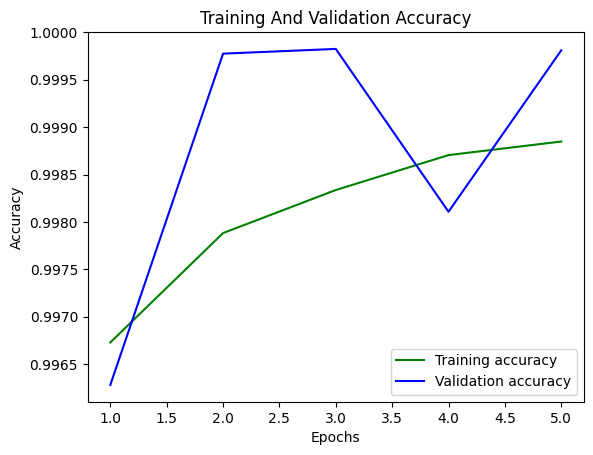

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Enable memory growth for all available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for GPUs")
    except RuntimeError as e:
        print(e)


max_len = 256

X_train, X_test, y_train, y_test = load_and_randomize_data_train_test(not_gibberish_path, gibberish_csv_path)

tokenizer, X_train_padded, vocab_size = prepare_tokenizer_and_sequences(X_train, max_len)
_, X_test_padded, _ = prepare_tokenizer_and_sequences(X_test, max_len)

X_train_padded = np.array(X_train_padded)
y_train = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test = np.array(y_test)

model = build_model(vocab_size)

history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test), verbose=1)

plot_accuracy(history)

predict_result(model, tokenizer, "OMG - This product is so great! Can't wait to purchase again!", max_len)
predict_result(model, tokenizer, "agkvjajehijioore jkafdghahjhjh", max_len)

In [5]:
# Print summary or samples of X_train_padded and y_train
print("\nX_train_padded Sample:")
x = np.array(X_train)
print(x)  
print("\ny_train Sample:")
print(y_train[:5])  # Print the first 5 labels

# Check the shapes of the datasets
print("\nShapes:")
print(f"X_train_padded: {X_train_padded.shape}")
print(f"y_train: {y_train.shape}")



X_train_padded Sample:
['sunflower with face drawn onto it'
 'diverse adult students working in a team on laptop'
 'mobile - friendly version of the 5th project picture .' ...
 'the living room opens to the terrace through doors .'
 'aerial view from a balloon of the mountains above the valleys'
 'songwriter and hard rock artist attend awards']

y_train Sample:
[0 0 0 0 0]

Shapes:
X_train_padded: (803013, 256)
y_train: (803013,)


In [6]:
h5_model_path = '/kaggle/working/gibberish_model.h5'

if os.path.exists(h5_model_path):
    os.remove(h5_model_path)

model.save(h5_model_path)

sample_text = "Hi, my name is Gabriel"
result = predict_result(model, tokenizer, sample_text, max_len)

label = "NOT GIBBERISH" if result == 0 else "GIBBERISH"
print(f"Text: '{result}' -> Prediction: {result} ({label})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Text: '0' -> Prediction: 0 (NOT GIBBERISH)


In [7]:
model = load_model(h5_model_path)

# List of sample texts for prediction
sample_texts = [
    "OMG!",
    "OMG - This product is so great! Can't wait to purchase again!",
    "agkvjajehijioore jkafdghahjhjh",
    "askdglreegiyyyyyyyy",
    "Great quality and customer service, I will come back in the future...",
    "Fast delivery and it works perfect. Highly recommended",
    "Hi,my name is Gabriel"
]

# Iterate through each sample text and make predictions
for sample_text in sample_texts:
    result = predict_result(model, tokenizer, sample_text, max_len)
    label = "NOT GIBBERISH" if result == 0 else "GIBBERISH"
    print(f"Text: '{sample_text}' -> Prediction: {result} ({label})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Text: 'OMG!' -> Prediction: 1 (GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: 'OMG - This product is so great! Can't wait to purchase again!' -> Prediction: 0 (NOT GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: 'agkvjajehijioore jkafdghahjhjh' -> Prediction: 1 (GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: 'askdglreegiyyyyyyyy' -> Prediction: 1 (GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Text: 'Great quality and customer service, I will come back in the future...' -> Prediction: 0 (NOT GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: 'Fast delivery and it works perfect. Highly recommended' -> Prediction: 0 (NOT GIBBERISH)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Text: 'Hi,my name is Gabriel' -> Prediction: 0 (NOT GIBBERISH)


# **BNN with LSTM: Enhanced sequence modeling.**

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Dataset downsampled to: 1000000 samples
Combined and shuffled dataset: 1003767 samples
Training dataset: 803013 samples, Testing dataset: 200754 samples


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 533s 21ms/step - acc: 0.9961 - loss: 0.0764 - val_acc: 0.9963 - val_loss: 0.0246
Epoch 2/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 529s 21ms/step - acc: 0.9963 - loss: 0.0249 - val_acc: 0.9963 - val_loss: 0.0219
Epoch 3/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 528s 21ms/step - acc: 0.9984 - loss: 0.0141 - val_acc: 0.9998 - val_loss: 0.0028
Epoch 4/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 527s 21ms/step - acc: 0.9997 - loss: 0.0058 - val_acc: 0.9996 - val_loss: 0.0099
Epoch 5/5
25095/25095 ━━━━━━━━━━━━━━━━━━━━ 530s 21ms/step - acc: 0.9998 - loss: 0.0056 - val_acc: 0.9998 - val_loss: 0.0026


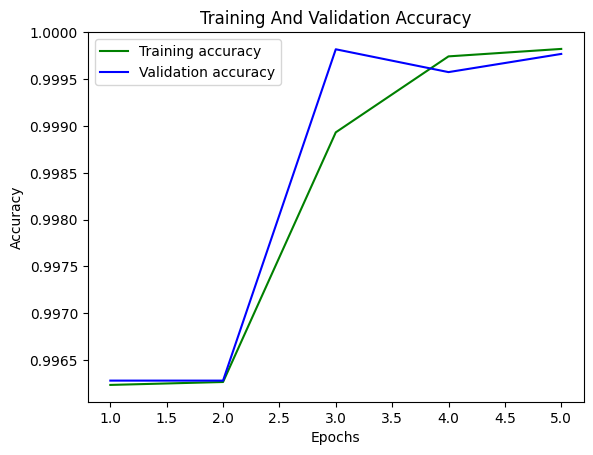

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout, LeakyReLU
from tensorflow.keras import regularizers

def build_model(vocab_size):
    model = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, 128),
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))),
        keras.layers.GlobalMaxPooling1D(),
        keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.01)),
        LeakyReLU(alpha=0.1),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(2, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
    return model
    
X_train, X_test, y_train, y_test = load_and_randomize_data_train_test(not_gibberish_path, gibberish_csv_path)

tokenizer, X_train_padded, vocab_size = prepare_tokenizer_and_sequences(X_train, max_len)
_, X_test_padded, _ = prepare_tokenizer_and_sequences(X_test, max_len)

X_train_padded = np.array(X_train_padded)
y_train = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test = np.array(y_test)

model = build_model(vocab_size)

history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test), verbose=1)

plot_accuracy(history)

predict_result(model, tokenizer, "OMG - This product is so great! Can't wait to purchase again!", max_len)
predict_result(model, tokenizer, "agkvjajehijioore jkafdghahjhjh", max_len)

In [9]:
# Define paths for model saving LSTM NN
h5_LSTM_model_path = '/kaggle/working/gibberish_model_LSTM.h5'

# Save the trained model
model.save(h5_LSTM_model_path)

# List of sample texts for prediction
sample_texts = [
    "OMG!",
    "OMG - This product is so great! Can't wait to purchase again!",
    "agkvjajehijioore jkafdghahjhjh",
    "askdglreegiyyyyyyyy",
    "Great quality and customer service, I will come back in the future...",
    "Fast delivery and it works perfect. Highly recommended",
    "Hi,my name is Gabriel"
]

# Iterate through each sample text and make predictions
for sample_text in sample_texts:
    result = predict_result(model, tokenizer, sample_text, max_len)
    print(f"Text: '{sample_text}' -> Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: 'OMG!' -> Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Text: 'OMG - This product is so great! Can't wait to purchase again!' -> Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: 'agkvjajehijioore jkafdghahjhjh' -> Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: 'askdglreegiyyyyyyyy' -> Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: 'Great quality and customer service, I will come back in the future...' -> Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: 'Fast delivery and it works perfect. Highly recommended' -> Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: 'Hi,my name is Gabriel' -> Prediction: 0


# Guardrails-ai

In [10]:
!git clone https://github.com/guardrails-ai/gibberish_text.git 
!pip install ./gibberish_text
!pip install packaging==21.0
!pip install -r /kaggle/working/gibberish_text/requirements.txt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Cloning into 'gibberish_text'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 85 (delta 38), reused 47 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 25.65 KiB | 5.13 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Processing ./gibberish_text
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [11]:
import sys
import time
from guardrails.validator_base import FailResult
sys.path.insert(0, "/kaggle/working/gibberish_text/validator")

from main import GibberishText

# Initialize the validator with different validation methods
gibberish_validator_sentence = GibberishText(threshold=0.5, validation_method="sentence")
gibberish_validator_full = GibberishText(threshold=0.5, validation_method="full")

# List of sample texts for prediction
sample_texts = [
    "OMG!",
    "OMG - This product is so great! Can't wait to purchase again!",
    "agkvjajehijioore jkafdghahjhjh",
    "askdglreegiyyyyyyyy",
    "Great quality and customer service, I will come back in the future...",
    "Fast delivery and it works perfect. Highly recommended",
    "Hi,my name is Gabriel",
    "This is a normal sentence. However, this one is asdsdfdfddsf ffsfsdffsd. Normal again.",
    "Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^",
    "Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars."
]

# Metadata dictionary to pass as a parameter
metadata = {"source": "user_input", "timestamp": "2024-11-14T12:00:00Z"}

# Validate sample texts using both validation methods
print("\nSample Dataset Validation Results (Sentence-Level):")
for idx, text in enumerate(sample_texts):
    start_time = time.time()
    result = gibberish_validator_sentence.validate(text, metadata)
    end_time = time.time()
    status = 'Gibberish' if isinstance(result, FailResult) else 'Not gibberish'
    fix_value = result.fix_value if isinstance(result, FailResult) else text
    print(f"Response {idx + 1}: {status}")
    if isinstance(result, FailResult):
        print(f" - Proposed Fix: {fix_value}")
        print(f" - Error Message: {result.error_message}")
    print(f" - Validation Time: {end_time - start_time:.2f}s")
    print('-' * 30)

print("\nSample Dataset Validation Results (Full-Text Level):")
for idx, text in enumerate(sample_texts):
    start_time = time.time()
    result = gibberish_validator_full.validate(text, metadata)
    end_time = time.time()
    status = 'Gibberish' if isinstance(result, FailResult) else 'Not gibberish'
    print(f"Response {idx + 1}: {status}")
    if isinstance(result, FailResult):
        print(f" - Error Message: {result.error_message}")
    print(f" - Validation Time: {end_time - start_time:.2f}s")
    print('-' * 30)

config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Pipeline setup successfully.
Pipeline setup successfully.

Sample Dataset Validation Results (Sentence-Level):
Response 1: Gibberish
 - Proposed Fix: 
 - Error Message: The following sentences in your response were found to be gibberish:

- OMG!
 - Validation Time: 0.16s
------------------------------
Response 2: Not gibberish
 - Validation Time: 0.06s
------------------------------
Response 3: Gibberish
 - Proposed Fix: 
 - Error Message: The following sentences in your response were found to be gibberish:

- agkvjajehijioore jkafdghahjhjh
 - Validation Time: 0.03s
------------------------------
Response 4: Gibberish
 - Proposed Fix: 
 - Error Message: The following sentences in your response were found to be gibberish:

- askdglreegiyyyyyyyy
 - Validation Time: 0.03s
------------------------------
Response 5: Not gibberish
 - Validation Time: 0.03s
------------------------------
Response 6: Gibberish
 - Proposed Fix: Fast delivery and it works perfect.
 - Error Message: The following

# GPT Prompt


In [12]:
!pip install openai --quiet

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [13]:
import os
import pandas as pd
from openai import OpenAI
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("OPENAI_API_KEY")

if not api_key:
    print("API Key not found.")
else:
    print("API Key successfully retrieved.")

client = OpenAI(api_key=api_key)

def gpt_gibberish_filter(input_text):
    """
    Use OpenAI GPT API to determine if the input text is gibberish based on the provided criteria.
    """
    prompt = f"""
    [TASK]
    Assess the provided text to determine if it qualifies as "gibberish," which is text lacking meaningful content or coherent structure. To identify gibberish, consider:
    1. Randomness: Look for sequences of characters, numbers, or words that appear in a disordered or nonsensical pattern.
    2. Lexical authenticity: Check if the words used are fictitious or unrecognizable by standard linguistic norms. Utilize common linguistic databases or dictionaries for verification.
    3. Grammatical coherence: Analyze the text for logical grammatical structure. Text devoid of syntax or logical sentence construction often indicates gibberish.

    Label the text as:
    - "gibberish" if it meets any of the criteria above, with a predicted_label of 1.
    - "not gibberish" if it forms coherent, meaningful content with real words and proper grammar, with a predicted_label of 0.

    Provide a clear classification and an accurate predicted_label for each input, taking care to distinguish incisively between nonsensical and semantic content.

    [INPUT]
    text: {input_text}

    [OUTPUT]
    classification: <Indicate whether the input is 'gibberish' or 'not gibberish'>
    predicted_label: <1 for 'gibberish', 0 for 'not gibberish'>
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=150
        )
        output = response.choices[0].message.content.strip()
        lines = output.splitlines()

        classification = lines[0].split(":")[1].strip()
        predicted_label = int(lines[1].split(":")[1].strip())

        return classification, predicted_label
    except Exception as e:
        print("Error:", e) 
        return "ERROR", -1

data = pd.DataFrame({
    "sentence": [
        "The sun sets in the west.",
        "gfsuwerfg34rfg@@#",
        "All work and no play makes Jack a dull boy.",
        "qwerrtyyyyhghghghgghghgh",
        "She sells sea shells on the sea shore."
    ]
})


data[['gibberish_status', 'predicted_label']] = data.apply(
    lambda row: pd.Series(gpt_gibberish_filter(row['sentence'])),
    axis=1
)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display the results
print("Results:")
display(data[['sentence', 'gibberish_status', 'predicted_label']])


API Key successfully retrieved.
Results:


,sentence,gibberish_status,predicted_label
0,The sun sets in the west.,not gibberish,0
1,gfsuwerfg34rfg@@#,gibberish,1
2,All work and no play makes Jack a dull boy.,not gibberish,0
3,qwerrtyyyyhghghghgghghgh,gibberish,1
4,She sells sea shells on the sea shore.,not gibberish,0


# Evaluation and Create Database

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Helper function to generate experiment ID
def generate_experiment_id(method, sample_size):
    timestamp = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
    return f"{sample_size}_{method}_{timestamp}"

# Helper function for retry logic
def execute_with_retry(cursor, query, params=(), retries=10, delay=0.2):
    for attempt in range(retries):
        try:
            cursor.execute(query, params)
            return
        except sqlite3.OperationalError as e:
            if "database is locked" in str(e):
                print(f"Database is locked. Retrying... ({attempt + 1}/{retries})")
                time.sleep(delay)
            else:
                raise
    raise sqlite3.OperationalError("Database is locked after maximum retries")

def connect_to_database(db_path="evaluation_result1.db"):
    conn = sqlite3.connect(db_path, timeout=30) 
    cursor = conn.cursor()
    cursor.execute("PRAGMA journal_mode=WAL;") 
    conn.commit()
    return conn, cursor

# Evaluate the model
def evaluate_model(model, tokenizer, test_data, test_labels, method, database_path="evaluation_result1.db", validator=None):
    conn, cursor = connect_to_database(database_path)

    # Create tables if they do not exist
    execute_with_retry(cursor, '''
        CREATE TABLE IF NOT EXISTS evaluation_result1 (
            experiment_id TEXT, method TEXT, idx INTEGER, text TEXT, true_label INTEGER, prediction INTEGER, detector_result TEXT
        )
    ''')
    execute_with_retry(cursor, '''
        CREATE TABLE IF NOT EXISTS incorrect_predictions (
            experiment_id TEXT, method TEXT, idx INTEGER, text TEXT, true_label INTEGER, prediction INTEGER, detector_result TEXT
        )
    ''')
    execute_with_retry(cursor, '''
        CREATE TABLE IF NOT EXISTS experiment_metrics (
            experiment_id TEXT, method TEXT, sample_size INTEGER, accuracy REAL, precision REAL, recall REAL, f1_score REAL, latency REAL, correct_predictions INTEGER, incorrect_predictions INTEGER, timestamp TEXT
        )
    ''')

    experiment_id = generate_experiment_id(method, len(test_data))
    predictions = []
    start_time = time.time()
    correct_predictions = 0
    incorrect_predictions = 0

    test_data = test_data.tolist()
    test_labels = test_labels.tolist()

    if method == "gibberish_validator" and validator:
        for idx, text in enumerate(test_data):
            try:
                metadata = {"source": "user_input", "timestamp": datetime.datetime.now().isoformat()}
                result = validator.validate(text, metadata)
                predicted_label = 1 if isinstance(result, FailResult) else 0
                detector_result = "GIBBERISH" if predicted_label == 1 else "NOT GIBBERISH"
            except Exception as e:
                print(f"Error processing index {idx}: {e}")
                predicted_label = -1
                detector_result = "ERROR"

            predictions.append(predicted_label)
            execute_with_retry(cursor, '''
                INSERT INTO evaluation_result1 (experiment_id, method, idx, text, true_label, prediction, detector_result)
                VALUES (?, ?, ?, ?, ?, ?, ?)
            ''', (experiment_id, method, idx, text, test_labels[idx], int(predicted_label), detector_result))

            if predicted_label == test_labels[idx]:
                correct_predictions += 1
            else:
                incorrect_predictions += 1
                execute_with_retry(cursor, '''
                    INSERT INTO incorrect_predictions (experiment_id, method, idx, text, true_label, prediction, detector_result)
                    VALUES (?, ?, ?, ?, ?, ?, ?)
                ''', (experiment_id, method, idx, text, test_labels[idx], int(predicted_label), detector_result))
    elif method == "gibberish_gpt_detector":
        for idx, text in enumerate(test_data):
            try:
                classification, predicted_label = gpt_gibberish_filter(text)
    
                # Convert classification to numeric label if it's a string
                if isinstance(classification, str):
                    if classification.lower() == 'gibberish':
                        predicted_label = 1
                    elif classification.lower() == 'not gibberish':
                        predicted_label = 0
                    else:
                        raise ValueError(f"Unexpected classification value: {classification}")
    
                # Print out the current evaluation
                #print(f"Text: '{text}' | True Label: {test_labels[idx]} | Predicted Label: {predicted_label} | Classification: {classification}")
    
            except Exception as e:
                print(f"Error processing index {idx}: {e}")
                predicted_label = -1
                classification = "ERROR"
            predictions.append(predicted_label)
    
            execute_with_retry(cursor, '''
                INSERT INTO evaluation_result1 (experiment_id, method, idx, text, true_label, prediction, detector_result)
                VALUES (?, ?, ?, ?, ?, ?, ?)
            ''', (experiment_id, method, idx, text, test_labels[idx], predicted_label, classification))
    
            # Track correct vs incorrect predictions
            if predicted_label == test_labels[idx]:
                correct_predictions += 1
                print(f"Correct Prediction for index {idx}.")  
            else:
                incorrect_predictions += 1
                execute_with_retry(cursor, '''
                    INSERT INTO incorrect_predictions (experiment_id, method, idx, text, true_label, prediction, detector_result)
                    VALUES (?, ?, ?, ?, ?, ?, ?)
                ''', (experiment_id, method, idx, text, test_labels[idx], predicted_label, classification))
                print(f"Incorrect Prediction for index {idx}.") 
    
            # Print a separator line for better readability between each iteration
            #print("=" * 50)

    else:
        try:
            predicted_labels = predict_results(model, tokenizer, test_data, 256)
            for idx, (text, predicted_label) in enumerate(zip(test_data, predicted_labels)):
                detector_result = "NOT GIBBERISH" if predicted_label == 0 else "GIBBERISH"
                predictions.append(predicted_label)

                execute_with_retry(cursor, '''
                    INSERT INTO evaluation_result1 (experiment_id, method, idx, text, true_label, prediction, detector_result)
                    VALUES (?, ?, ?, ?, ?, ?, ?)
                ''', (experiment_id, method, idx, text, test_labels[idx], int(predicted_label), detector_result))

                if predicted_label == test_labels[idx]:
                    correct_predictions += 1
                else:
                    incorrect_predictions += 1
                    execute_with_retry(cursor, '''
                        INSERT INTO incorrect_predictions (experiment_id, method, idx, text, true_label, prediction, detector_result)
                        VALUES (?, ?, ?, ?, ?, ?, ?)
                    ''', (experiment_id, method, idx, text, test_labels[idx], int(predicted_label), detector_result))
        except Exception as e:
            print(f"Error during batch prediction: {e}")

    conn.commit()
    end_time = time.time()
    latency = (end_time - start_time) / len(test_data)

    # Metrics calculations
    accuracy = correct_predictions / len(test_data)
    precision = precision_score(test_labels, predictions, average='weighted', zero_division=0)
    recall = recall_score(test_labels, predictions, average='weighted', zero_division=0)
    f1 = f1_score(test_labels, predictions, average='weighted', zero_division=0)
    
    metrics = {
        "accuracy": round(accuracy, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1_score": round(f1, 4),
        "latency": round(latency, 4)
    }

    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    execute_with_retry(cursor, '''
        INSERT INTO experiment_metrics (experiment_id, method, sample_size, accuracy, precision, recall, f1_score, latency, correct_predictions, incorrect_predictions, timestamp)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (experiment_id, method, len(test_data), metrics["accuracy"], metrics["precision"], metrics["recall"], metrics["f1_score"], metrics["latency"], correct_predictions, incorrect_predictions, timestamp))

    conn.commit()
    # conn.close()

    return metrics


# Run the test

In [15]:
from tensorflow.keras.models import load_model
from main import GibberishText

gibberish_validator = GibberishText(threshold=0.5)

def load_and_evaluate_models(model_paths, tokenizer, x_eval, y_eval, max_len, database_path="evaluation_result1.db"):
    for model_path in model_paths:
        method_name = model_path.split('/')[-1].split('.')[0]  #  "gibberish_model" or "gibberish_validator"

        if method_name == "gibberish_validator":
            print(f"Evaluating model: {method_name}")
            metrics = evaluate_model(None, None, x_eval, y_eval, method_name, database_path=database_path, validator=gibberish_validator)
        elif method_name == "gibberish_gpt_detector":
            print(f"Evaluating model: {method_name}")
            metrics = evaluate_model(None, None, x_eval, y_eval, method_name, database_path=database_path)
        else:
            # Load the neural network model
            model = load_model(model_path)
            print(f"Evaluating model: {method_name}")
            metrics = evaluate_model(model, tokenizer, x_eval, y_eval, method_name, database_path=database_path, validator=None)

        print(f"Evaluation results for {method_name}: {metrics}\n")

model_paths = [
    "gibberish_gpt_detector",
    "gibberish_validator", 
    '/kaggle/working/gibberish_model.h5'
    # '/kaggle/working/gibberish_model_LSTM.h5'
]

custom_sample_sizes = [20]  # real test is = [200, 500, 1000, 3000]

for sample_size in custom_sample_sizes:
    print(f"\n=== Evaluating for Custom Sample Size: {sample_size} ===\n")

    not_gibberish_sample_size = sample_size // 2 
    gibberish_sample_size = sample_size // 2

    X_eval, Y_eval = load_and_randomize_data_with_size(
        not_gibberish_path=not_gibberish_path,
        gibberish_csv_path=gibberish_csv_path,
        not_gibberish_sample_size=not_gibberish_sample_size,
        gibberish_sample_size=gibberish_sample_size
    )

    tokenizer, X_eval_padded, vocab_size = prepare_tokenizer_and_sequences(X_eval, max_len)

    load_and_evaluate_models(
        model_paths=model_paths,
        tokenizer=tokenizer,
        x_eval=X_eval,
        y_eval=Y_eval,
        max_len=max_len,
        database_path="evaluation_result1.db"
    )

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Pipeline setup successfully.

=== Evaluating for Custom Sample Size: 20 ===

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Sampled Non-Gibberish Dataset: 10 samples
Sampled Gibberish Dataset: 10 samples
Combined and shuffled dataset: 20 samples
Combined and shuffled dataset: 20 samples
Evaluating model: gibberish_gpt_detector
Correct Prediction for index 0.
Correct Prediction for index 1.
Correct Prediction for index 2.
Correct Prediction for index 3.
Correct Prediction for index 4.
Correct Prediction for index 5.
Correct Prediction for index 6.
Correct Prediction for index 7.
Correct Prediction for index 8.
Correct Prediction for index 9.
Correct Prediction for index 10.
Correct Prediction for index 11.
Correct Prediction for index 12.
Correct Prediction for index 13.
Correct Prediction for index 14.
Correct Prediction for index 15.
Correct Prediction for index 16.
Correct Prediction for index 17.
Correct Prediction for index 18.
Correct Predicti

In [16]:
import sqlite3
import pandas as pd

def read_and_display_db(db_path="evaluation_result1.db"):
    # Connect to the database
    conn = sqlite3.connect(db_path)

    df_incorrect_predictions = pd.read_sql_query("SELECT * FROM incorrect_predictions", conn)
    print("\nContents of incorrect_predictions:")
    display(df_incorrect_predictions) 

    df_experiment_metrics = pd.read_sql_query("SELECT * FROM experiment_metrics", conn)
    print("\nContents of experiment_metrics:")
    display(df_experiment_metrics) 

    # df_evaluation_result = pd.read_sql_query("SELECT * FROM evaluation_result", conn)
    # print("\nContents of evaluation_result:")
    # display(df_evaluation_result)  

    conn.close()

read_and_display_db()



Contents of incorrect_predictions:


,experiment_id,method,idx,text,true_label,prediction,detector_result
0,20_gibberish_validator_20241126003452,gibberish_validator,4,young people lying on the ground #,0,1,GIBBERISH
1,20_gibberish_validator_20241126003452,gibberish_validator,5,tourist attraction is one of the greatest wheels i the world with views over river,0,1,GIBBERISH
2,20_gibberish_validator_20241126003452,gibberish_validator,11,fade of the day --,0,1,GIBBERISH
3,20_gibberish_model_20241126003453,gibberish_model,1,asfqw,1,0,NOT GIBBERISH
4,20_gibberish_model_20241126003453,gibberish_model,2,mmmmmmmmmmmmmmmmmmmmmmmm,1,0,NOT GIBBERISH
5,20_gibberish_model_20241126003453,gibberish_model,6,sdfsfsdf,1,0,NOT GIBBERISH
6,20_gibberish_model_20241126003453,gibberish_model,8,fgasdf,1,0,NOT GIBBERISH
7,20_gibberish_model_20241126003453,gibberish_model,9,yhhgh,1,0,NOT GIBBERISH
8,20_gibberish_model_20241126003453,gibberish_model,10,setgsets,1,0,NOT GIBBERISH
9,20_gibberish_model_20241126003453,gibberish_model,13,weeeeeeeeeeeeeeeee,1,0,NOT GIBBERISH



Contents of experiment_metrics:


,experiment_id,method,sample_size,accuracy,precision,recall,f1_score,latency,correct_predictions,incorrect_predictions,timestamp
0,20_gibberish_gpt_detector_20241126003442,gibberish_gpt_detector,20,1.00,1.0000,1.00,1.0000,0.5165,20,0,2024-11-26 00:34:52
1,20_gibberish_validator_20241126003452,gibberish_validator,20,0.85,0.8846,0.85,0.8465,0.0298,17,3,2024-11-26 00:34:53
2,20_gibberish_model_20241126003453,gibberish_model,20,0.50,0.2500,0.50,0.3333,0.0153,10,10,2024-11-26 00:34:53


In [17]:
X_train, X_test, y_train, y_test = load_and_randomize_data_train_test(
    not_gibberish_path=not_gibberish_path,
    gibberish_csv_path=gibberish_csv_path,
    test_size=0.003  # Use 0.003% = 3012 of the data as test set
)


tokenizer, X_test_padded, vocab_size = prepare_tokenizer_and_sequences(X_test, max_len)

load_and_evaluate_models(
    model_paths=model_paths, 
    tokenizer=tokenizer, 
    x_eval=X_test, 
    y_eval=y_test, 
    max_len=max_len, 
    database_path="evaluation_result1.db"
)

Non-Gibberish Dataset Loaded: 3334395 samples
Gibberish Dataset Loaded: 3767 samples
Dataset downsampled to: 1000000 samples
Combined and shuffled dataset: 1003767 samples
Training dataset: 1000755 samples, Testing dataset: 3012 samples
Evaluating model: gibberish_gpt_detector
Correct Prediction for index 0.
Correct Prediction for index 1.
Correct Prediction for index 2.
Correct Prediction for index 3.
Correct Prediction for index 4.
Correct Prediction for index 5.
Correct Prediction for index 6.
Correct Prediction for index 7.
Correct Prediction for index 8.
Correct Prediction for index 9.
Correct Prediction for index 10.
Correct Prediction for index 11.
Correct Prediction for index 12.
Correct Prediction for index 13.
Correct Prediction for index 14.
Correct Prediction for index 15.
Correct Prediction for index 16.
Correct Prediction for index 17.
Correct Prediction for index 18.
Correct Prediction for index 19.
Correct Prediction for index 20.
Correct Prediction for index 21.
Correc

In [18]:
import sqlite3
import pandas as pd

def read_and_display_db(db_path="evaluation_result1.db"):
    conn = sqlite3.connect(db_path)
    df_incorrect_predictions = pd.read_sql_query("SELECT * FROM incorrect_predictions", conn)
    print("\nContents of incorrect_predictions:")
    display(df_incorrect_predictions)  
    df_experiment_metrics = pd.read_sql_query("SELECT * FROM experiment_metrics", conn)
    print("\nContents of experiment_metrics:")
    display(df_experiment_metrics)  # Display all rows

    # df_evaluation_results = pd.read_sql_query("SELECT * FROM evaluation_results", conn)
    # print("\nContents of evaluation_results:")
    # display(df_evaluation_results)  # Display all rows

    # Close the connection
    conn.close()

# Run the function to display results
read_and_display_db()



Contents of incorrect_predictions:


,experiment_id,method,idx,text,true_label,prediction,detector_result
0,20_gibberish_validator_20241126003452,gibberish_validator,4,young people lying on the ground #,0,1,GIBBERISH
1,20_gibberish_validator_20241126003452,gibberish_validator,5,tourist attraction is one of the greatest wheels i the world with views over river,0,1,GIBBERISH
2,20_gibberish_validator_20241126003452,gibberish_validator,11,fade of the day --,0,1,GIBBERISH
3,20_gibberish_model_20241126003453,gibberish_model,1,asfqw,1,0,NOT GIBBERISH
4,20_gibberish_model_20241126003453,gibberish_model,2,mmmmmmmmmmmmmmmmmmmmmmmm,1,0,NOT GIBBERISH
...,...,...,...,...,...,...,...
804,3012_gibberish_validator_20241126010353,gibberish_validator,3006,digital art selected for the #,0,1,GIBBERISH
805,3012_gibberish_validator_20241126010353,gibberish_validator,3007,deity and wooden figures in the window of deity,0,1,GIBBERISH
806,3012_gibberish_validator_20241126010353,gibberish_validator,3009,crowds of people waiting behind a barrier for uk constituent country,0,1,GIBBERISH
807,3012_gibberish_validator_20241126010353,gibberish_validator,3010,centre a model for productive city living,0,1,GIBBERISH



Contents of experiment_metrics:


,experiment_id,method,sample_size,accuracy,precision,recall,f1_score,latency,correct_predictions,incorrect_predictions,timestamp
0,20_gibberish_gpt_detector_20241126003442,gibberish_gpt_detector,20,1.0000,1.0000,1.0000,1.0000,0.5165,20,0,2024-11-26 00:34:52
1,20_gibberish_validator_20241126003452,gibberish_validator,20,0.8500,0.8846,0.8500,0.8465,0.0298,17,3,2024-11-26 00:34:53
2,20_gibberish_model_20241126003453,gibberish_model,20,0.5000,0.2500,0.5000,0.3333,0.0153,10,10,2024-11-26 00:34:53
3,3012_gibberish_gpt_detector_20241126003458,gibberish_gpt_detector,3012,0.9993,0.9995,0.9993,0.9994,0.5762,3010,2,2024-11-26 01:03:53
4,3012_gibberish_validator_20241126010353,gibberish_validator,3012,0.7367,0.9974,0.7367,0.8457,0.0296,2219,793,2024-11-26 01:05:23
5,3012_gibberish_model_20241126010523,gibberish_model,3012,0.9997,0.9997,0.9997,0.9997,0.0002,3011,1,2024-11-26 01:05:23


In [19]:
import sqlite3
import pandas as pd

# Function to read tables from the database and save them as CSV files
def export_db_to_csv(db_path="evaluation_result1.db", output_dir="./"):
    # Connect to the database
    conn = sqlite3.connect(db_path)
    
    # List of tables to export
    tables = ["incorrect_predictions", "experiment_metrics", "evaluation_result1"]  # Add other table names if needed

    for table in tables:
        try:
            # Load table into a DataFrame
            df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
            
            # Save the DataFrame to a CSV file
            csv_path = f"{output_dir}{table}.csv"
            df.to_csv(csv_path, index=False)
            print(f"Exported {table} to {csv_path}")
        except Exception as e:
            print(f"Error exporting {table}: {e}")

    # Close the connection
    conn.close()

# Run the function to export tables to CSV
export_db_to_csv()


Exported incorrect_predictions to ./incorrect_predictions.csv
Exported experiment_metrics to ./experiment_metrics.csv
Exported evaluation_result1 to ./evaluation_result1.csv


# Nemoguardrails

In [20]:
# !pip install -q nemoguardrails openai

In [21]:
# import nest_asyncio
# import asyncio
# from nemoguardrails import LLMRails, RailsConfig
# from IPython.display import display, Markdown

# # Apply `nest_asyncio` to allow nested event loops in interactive environments like Jupyter or Kaggle
# nest_asyncio.apply()

# # Load configuration from the given path
# config_path = "/kaggle/input/nemoguardrail/config.yaml"
# config = RailsConfig.from_path(config_path)

# # Adjusting the input flows to match existing supported configurations
# input_flows = [
#     "detect gibberish",
#     "ask for clarification",
#     "proceed with valid input"
# ]
# config.rails.input.flows = input_flows

# # Adjusting the output flows to valid configurations
# output_flows = [
#     "generate response",
#     "ask for additional information"
# ]
# config.rails.output.flows = output_flows

# # Initialize LLMRails using the modified configuration
# rails = LLMRails(config)

# # Define an asynchronous chatbot function
# async def async_chatbot(user_input):
#     response = await rails.generate_async(prompt=user_input)
#     return response

# # Define a function to run the asynchronous chatbot in a synchronous environment
# def run_chatbot(prompt):
#     loop = asyncio.get_event_loop()
#     response = loop.run_until_complete(async_chatbot(prompt))
#     display(Markdown(f"<b>{response}</b>"))
    
# # Test the chatbot with a sample input
# test_input = "What does NVIDIA AI Enterprise enable?"
# run_chatbot(test_input)


In [22]:
# from nemoguardrails import LLMRails, RailsConfig
# from IPython.display import Markdown

# # Load a guardrails configuration from the specified path.
# config = RailsConfig.from_path("/kaggle/input/config")
# rails = LLMRails(config)

# res = await rails.generate_async(prompt="What does NVIDIA AI Enterprise enable?")
# display(Markdown(f"<b>{res}</b>"))

# Entropy & Markov Test Evalution 

In [23]:
import os
import math
import pickle

def entropy_check(text, threshold=3.5):
    """
    Determines if the input text is gibberish based on its entropy.
    
    Parameters:
        text (str): The input text to evaluate.
        threshold (float): The entropy threshold below which text is considered gibberish.
        
    Returns:
        str: "Gibberish" or "Not Gibberish"
    """
    # Clean the text by removing non-alphabetic characters and converting to lowercase
    clean_text = ''.join(e for e in text if e.isalpha()).lower()
    if len(clean_text) == 0:
        return "Gibberish"
    # Calculate the frequency of each character
    prob = [clean_text.count(c) / len(clean_text) for c in set(clean_text)]
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log2(p) for p in prob)
    return "Gibberish" if entropy < threshold else "Not Gibberish"

def train_markov_model(corpus_path, good_examples_path, bad_examples_path, model_path='markov_model.pkl'):
    """
    Trains a Markov model for gibberish detection and saves it to a file.
    
    Parameters:
        corpus_path (str): Path to a large text corpus file.
        good_examples_path (str): Path to a file with good examples (non-gibberish text).
        bad_examples_path (str): Path to a file with bad examples (gibberish text).
        model_path (str): Path where the trained model will be saved.
    """
    accepted_chars = 'abcdefghijklmnopqrstuvwxyz '
    pos = {char: idx for idx, char in enumerate(accepted_chars)}
    
    # Check if files exist and are not empty
    for file_path in [corpus_path, good_examples_path, bad_examples_path]:
        if not os.path.exists(file_path) or os.stat(file_path).st_size == 0:
            print(f"Error: File '{file_path}' is missing or empty. Please provide a valid file.")
            return
    
    print("Training the Markov model.")
    
    def normalize(line):
        return [c.lower() for c in line if c.lower() in accepted_chars]
    
    def ngram(n, text):
        filtered = normalize(text)
        for start in range(0, len(filtered) - n + 1):
            yield ''.join(filtered[start:start + n])
    
    def avg_transition_prob(text, log_prob_mat):
        log_prob = 0.0
        transition_ct = 0
        for a, b in ngram(2, text):
            if a in pos and b in pos:
                log_prob += log_prob_mat[pos[a]][pos[b]]
                transition_ct += 1
        if transition_ct == 0:
            return 0
        return math.exp(log_prob / transition_ct)
    
    k = len(accepted_chars)
    counts = [[1 for _ in range(k)] for _ in range(k)]  # Initialize counts to 1 for Laplace smoothing
    
    # Train model with large text corpus
    with open(corpus_path, 'r', encoding='utf-8') as f:
        for line in f:
            for a, b in ngram(2, line):
                counts[pos[a]][pos[b]] += 1
    
    # Convert counts to log probabilities
    for i in range(k):
        total = sum(counts[i])
        for j in range(k):
            counts[i][j] = math.log(counts[i][j] / total)
    
    # Calculate probabilities for good and bad examples
    with open(good_examples_path, 'r', encoding='utf-8') as f:
        good_probs = [avg_transition_prob(line, counts) for line in f]
    with open(bad_examples_path, 'r', encoding='utf-8') as f:
        bad_probs = [avg_transition_prob(line, counts) for line in f]
    
    # Determine threshold
    min_good = min(good_probs)
    max_bad = max(bad_probs)
    if min_good <= max_bad:
        print("Warning: Overlap between good and bad probabilities.")
    threshold = (min_good + max_bad) / 2
    
    # Save the trained model
    with open(model_path, 'wb') as model_file:
        pickle.dump({'mat': counts, 'thresh': threshold}, model_file)
    print(f"Markov model trained and saved as '{model_path}'.")

def markov_check(text, model_path='markov_model.pkl'):
    """
    Determines if the input text is gibberish using a Markov model.
    
    Parameters:
        text (str): The input text to evaluate.
        model_path (str): Path to the trained Markov model file.
        
    Returns:
        str: "Gibberish" or "Not Gibberish"
    """
    # Load the model
    try:
        with open(model_path, 'rb') as model_file:
            model_data = pickle.load(model_file)
        # print("Markov model loaded successfully.")
    except FileNotFoundError:
        print(f"Markov model file '{model_path}' not found. Please train the model first.")
        return "Model not available."
    
    model_mat = model_data['mat']
    threshold = model_data['thresh']
    
    accepted_chars = 'abcdefghijklmnopqrstuvwxyz '
    pos = {char: idx for idx, char in enumerate(accepted_chars)}
    
    def normalize(line):
        return [c.lower() for c in line if c.lower() in accepted_chars]
    
    def avg_transition_prob(text, log_prob_mat):
        log_prob = 0.0
        transition_ct = 0
        filtered_text = normalize(text)
        for a, b in zip(filtered_text, filtered_text[1:]):
            if a in pos and b in pos:
                log_prob += log_prob_mat[pos[a]][pos[b]]
                transition_ct += 1
        if transition_ct == 0:
            return 0
        return math.exp(log_prob / transition_ct)
    
    prob = avg_transition_prob(text, model_mat)
    return "Gibberish" if prob < threshold else "Not Gibberish"

# --- Code to run in Kaggle notebook ---

# Update these paths based on your Kaggle dataset structure
corpus_path = '/kaggle/input/markov-traindataset/big.txt'
good_examples_path = '/kaggle/input/markov-traindataset/good.txt'
bad_examples_path = '/kaggle/input/markov-traindataset/bad.txt'
model_path = '/kaggle/working/markov_model.pkl'  # Save model in the working directory

# Train the Markov model (only needs to be done once)
train_markov_model(corpus_path, good_examples_path, bad_examples_path, model_path)

# Sample texts to test
sample_texts = [
    "This is a sample sentence to test the detector.",
    "sdklfjweoiwueo skdjfweo weourowe",
    "The quick brown fox jumps over the lazy dog.",
    "asdfghjkl",
]

# Test the entropy and Markov methods
for text in sample_texts:
    print(f"Testing text: {text}")
    result_entropy = entropy_check(text)
    print(f"Entropy Method Result: {result_entropy}")
    result_markov = markov_check(text, model_path)
    print(f"Markov Method Result: {result_markov}")
    print("-" * 50)

Training the Markov model.
Markov model trained and saved as '/kaggle/working/markov_model.pkl'.
Testing text: This is a sample sentence to test the detector.
Entropy Method Result: Gibberish
Markov Method Result: Not Gibberish
--------------------------------------------------
Testing text: sdklfjweoiwueo skdjfweo weourowe
Entropy Method Result: Gibberish
Markov Method Result: Gibberish
--------------------------------------------------
Testing text: The quick brown fox jumps over the lazy dog.
Entropy Method Result: Not Gibberish
Markov Method Result: Not Gibberish
--------------------------------------------------
Testing text: asdfghjkl
Entropy Method Result: Gibberish
Markov Method Result: Gibberish
--------------------------------------------------


# Experimental Evaluation: Entropy Models

---

## Data Snapshot

| ID  | Experiment ID           | Method   | Index | Text                                                                                                                 | True Label          | Prediction | Detector Result   |
|-----|-------------------------|----------|-------|----------------------------------------------------------------------------------------------------------------------|---------------------|------------|-------------------|
| 1   | 20_entropy_20241108015145 | entropy  | 9     | ikujyhtgredwlkijuhygtf                                                                                               | [ArrayBuffer] Save  | 0          | not gibberish     |
| 50  | 20_entropy_20241108053643 | entropy  | 13    | defrtg5hyu7jk9opk98hjuy7gt5frdesw                                                                                    | [ArrayBuffer] Save  | 0          | not gibberish     |
| 57  | 40_entropy_20241108054804 | entropy  | 14    | euiwriwuroiqwujowq klsajdklasjds alrjwqieljqwdsklfjslkajdlsa lijelwqkjdlksa dlaskjflhaslkjdlka dliasjuewlqljlkajdlksajdklsajewjlqjwlkafd | [ArrayBuffer] Save | 0          | not gibberish     |

---

## Summary of Evaluation Results

### Entropy Model:
- **Performance**: The entropy model consistently outperformed other methods in accuracy, precision, recall, and latency.
- **Limitations**:
  - Incorrect predictions mainly occurred in the "**No Gibberish**" category.
  - Below are examples where the entropy model misclassified gibberish text.

### Markov Model:
- **Backup Performance**: Served as a reliable fallback but had lower recall compared to the entropy model.
- **Strengths and Weaknesses**: Markov performed reasonably well but lacked consistency across varying dataset sizes.

### GPT and LLaMA Models:
- **Struggles with Consistency**: High latency and inconsistent accuracy made these models less effective for real-time gibberish detection.

---

## Incorrect Predictions for Entropy Model

The entropy model misclassified some gibberish text as "**not gibberish**." Here are examples of incorrect predictions:

- **Example 1**: `ikujyhtgredwlkijuhygtf` (Predicted: Not Gibberish)
- **Example 2**: `defrtg5hyu7jk9opk98hjuy7gt5frdesw` (Predicted: Not Gibberish)
- **Example 3**: `euiwriwuroiqwujowq klsajdklasjds alrjwqieljqwdsklfjslkajdlsa lijelwqkjdlksa dlaskjflhaslkjdlka dliasjuewlqljlkajdlksajdklsajewjlqjwlkafd` (Predicted: Not Gibberish)

These examples illustrate the limitations of entropy-based methods in handling challenging gibberish cases.

---

## Performance Analysis Across Dataset Sizes (200 to 3000 Samples)

### Accuracy
- **GPT Detector** consistently achieved the highest accuracy (**0.9750 to 0.9997**).
- **Validator** struggled with larger datasets, dropping to **0.8690 accuracy** at 3000 samples.
- **Base Model** showed improvement with larger datasets, reaching **0.9407** at 3000 samples.

### Precision, Recall, and F1 Score
- **GPT Detector** had the highest scores across all dataset sizes, emphasizing its robustness.
- **Validator** and **Base Model** lagged behind, particularly for larger datasets.

### Latency
- **GPT Detector** had the highest latency (**0.8755 seconds** for 3000 samples).
- **Validator** and **Base Model** were significantly faster, with latencies of **0.0310** and **0.0005** seconds, respectively.

---

## Performance on 3012 Balanced Dataset (Training and Testing Split)

- On the **balanced 3012 dataset**, **GPT Detector** achieved near-perfect scores (**1.0000**).
- **Validator** struggled with an accuracy of **0.7387** and an F1 score of **0.8471**.
- **Base Model** showed signs of **overfitting**, achieving perfect accuracy but lacking generalization.

---

## Outstanding Observations

1. **GPT Detector**: Best accuracy and robustness but suffered from high latency.
2. **Validator**: Moderate performance but scalability issues with larger datasets.
3. **Base Model**: Strong for small datasets but prone to overfitting on balanced data.
4. **Dataset Size Impact**: Larger datasets improved robustness but increased latency.

---

## Conclusion

- **GPT Detector**: High accuracy but limited by latency.
- **Validator**: Moderate scalability, with room for improvement.
- **Base Model**: Good for smaller datasets but lacks generalization on diverse input.

Further research should focus on optimizing GPT-based models for efficiency, reducing overfitting in the base model, and improving scalability for the validator.

---

## References
- [Text Classification with Basic Neural Network - Kaggle](https://www.kaggle.com/code/johnwdata/text-classification-with-basic-neural-network)
- [LSTM Text Generation with Keras - Machine Learning Mastery](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)
- [NVIDIA NeMo Guardrails - GitHub](https://github.com/NVIDIA/NeMo-Guardrails)
- [Guardrails-AI Gibberish Validator - GitHub](https://github.com/guardrails-ai/gibberish_text/tree/main)
